## Lab 7.a

Brief diversion, solutions to **Assignment 1** and **Quiz 1**.

### The remainder of this lab will be a sequence of introductory Sympy exercises

**Exercise 1**: In class we saw the equality expression "==" in Sympy sometimes gives *false negatives*, i.e. it might say two expressions are not equal, when they are. 

Find a way to use Sympy's [**simplify**](https://docs.sympy.org/latest/tutorial/simplification.html) command to verify the two expressions

$$\frac{1}{\sqrt{2}-1} \text{ and } \sqrt{2} + 1$$

are equal.

In [11]:
import sympy as sp
print("We will ask Sympy to simplify the expression: ")
SPE =  1/(sp.sqrt(2)-1) - sp.sqrt(2) -1
sp.pprint(SPE)
sp.simplify( SPE )
## equal! 

We will ask Sympy to simplify the expression: 
             1   
-√2 - 1 + ───────
          -1 + √2


0

**Exercise 2**: Write a function $f(n)$ that returns a Sympy polynomial that is the degree $2n$ Taylor expansion of the $\cos x$ function.

$$T^{2n}(x) = 1 - \frac{x^2}{2!}x^2 + \frac{x^4}{4!}x^4 + \cdots + (-1)^n\frac{x^{2n}}{(2n)!}x^{2n}$$

Print out these polynomials for $n=1,2,3,4,5$ and use Sympy to compute the
derivative of these polynomials.


In [82]:
import fractions as fr
import math as ma

x = sp.Symbol('x')

def f(n):
    cof = [(-1)**k*fr.Fraction(1, ma.factorial(2*k) )*x**(2*k) for k in range(n+1)]
    return(sum(cof))
    
for n in [1,2,3,4,5]:
    sp.pprint(f(n))
    print("diff")
    sp.pprint(sp.diff(f(n), x))
    print(" * * * * * * * ")

   2    
  x     
- ── + 1
  2     
diff
-x
 * * * * * * * 
 4    2    
x    x     
── - ── + 1
24   2     
diff
 3    
x     
── - x
6     
 * * * * * * * 
    6    4    2    
   x    x    x     
- ─── + ── - ── + 1
  720   24   2     
diff
    5    3    
   x    x     
- ─── + ── - x
  120   6     
 * * * * * * * 
   8      6    4    2    
  x      x    x    x     
───── - ─── + ── - ── + 1
40320   720   24   2     
diff
  7      5    3    
 x      x    x     
──── - ─── + ── - x
5040   120   6     
 * * * * * * * 
     10        8      6    4    2    
    x         x      x    x    x     
- ─────── + ───── - ─── + ── - ── + 1
  3628800   40320   720   24   2     
diff
     9       7      5    3    
    x       x      x    x     
- ────── + ──── - ─── + ── - x
  362880   5040   120   6     
 * * * * * * * 


**Exercise 3**: Compute the composite of the Taylor polynomial from Ex.2 with the function $x^2$, i.e. $T^{2n}(x^2)$ for $n=1,2,3,4,5$.

From Calculus, this is a Taylor polynomial (of the appropriate order) for the function $\cos(x^2)$.

Use Sympy to compute the integrals:
$$\int_0^x \cos(x^2) dx$$ 
$$\int_0^x T^{2n}(x^2) dx \text{  for  } n=1,2,3,4,5.$$

**Advice**: You can replace a variable with another in a Sympy expression with the [subs](https://docs.sympy.org/latest/tutorial/basic_operations.html) (substitute) command.

Put the plots of these functions in one common matplotlib plot, so that they can be compared.  Make the domain of the plot $x = [-2\pi,2\pi]$. 

**Advice**: You might find that due to the polynomials being extremely large towards the ends of the integration, it will help to set the **y-limits** of your plot to reasonable numbers such as $-2.0$ and $2.0$. Otherwise your plot's y-scale could be so large that it distorts the most interesting features of your functions.  Look up the [ylim](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylim.html) command for *pyplot*.


In [83]:
pollist = [f(n).subs(x, x**2) for n in [1,2,3,4,5]]

intlist = [sp.integrate(p,x) for p in pollist]

F = sp.integrate(sp.cos(x**2), x)


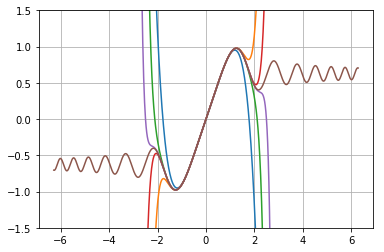

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
plt.close()

X = np.linspace(-2*np.pi, 2*np.pi, 1000)

plt.ylim((-1.5, 1.5))
plt.grid()

for p in intlist:
    plt.plot(X, [p.evalf(subs={x:q}) for q in X])

plt.plot(X, [F.evalf(subs={x:q}) for q in X])

plt.show()